In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from scipy import stats
import json
import ast
from sklearn.cluster import KMeans

# Data loading

In [ ]:
df = pd.read_excel("Clients.xlsx")
df

,Unnamed: 0,id,deleted,deleted_at,dailyRevenue,has_tables,name,opening_time,shop_type_flag,ticket_number
0,0,1LeuTEU1OaTbPIDjbkfa2LdHJ2m2,0.0,NaN,0.0,1.0,ILIADE BAR 1,05:00,restaurant,8.0
1,1,1YUuyZj3vaguDV6kniXkjZHGsVJ3,0.0,NaN,0.0,0.0,THE GRILL,06:00,restaurant,1.0
2,2,1fdugKSBzPdBlloqLvtlzHhfKZ22,0.0,NaN,0.0,1.0,MISK,05:00,restaurant,21.0
3,3,1lHIQ4SKtgdB097iGGt2cSiNxr92,1.0,24-03-2022,0.0,1.0,STOCK TEST,06:00,restaurant,8.0
4,4,1wkiFE5YD3fxqTICRHJyGRoCs3k2,0.0,NaN,0.0,1.0,365 CLUB CAFE,07:00,restaurant,151.0
...,...,...,...,...,...,...,...,...,...,...
147,147,yPFnCPwL8dNnIvz0PzbKRwUOAfF2,1.0,27-12-2021,NaN,1.0,BAIA TEST,05:00,restaurant,0.0
148,148,yrtyvXC2bkVtAW6REaBy1MRMUg73,0.0,NaN,0.0,1.0,BAR CENTRAL CWM,05:00,restaurant,0.0
149,149,ywAv0kkVVifXpe108MhktRUePUH3,1.0,27-12-2021,0.0,NaN,CAFE'IN,05:00,restaurant,0.0
150,150,z6g3Pjyf6PPLhQb9XhUg7JOeoty2,0.0,NaN,NaN,1.0,590,09:09,restaurant,0.0


# Final Data Cleaning

In [ ]:
drop_list = ['deleted_at','dailyRevenue']

df=df.drop(drop_list,axis=1)
df

,Unnamed: 0,id,deleted,has_tables,name,opening_time,shop_type_flag,ticket_number
0,0,1LeuTEU1OaTbPIDjbkfa2LdHJ2m2,0.0,1.0,ILIADE BAR 1,05:00,restaurant,8.0
1,1,1YUuyZj3vaguDV6kniXkjZHGsVJ3,0.0,0.0,THE GRILL,06:00,restaurant,1.0
2,2,1fdugKSBzPdBlloqLvtlzHhfKZ22,0.0,1.0,MISK,05:00,restaurant,21.0
3,3,1lHIQ4SKtgdB097iGGt2cSiNxr92,1.0,1.0,STOCK TEST,06:00,restaurant,8.0
4,4,1wkiFE5YD3fxqTICRHJyGRoCs3k2,0.0,1.0,365 CLUB CAFE,07:00,restaurant,151.0
...,...,...,...,...,...,...,...,...
147,147,yPFnCPwL8dNnIvz0PzbKRwUOAfF2,1.0,1.0,BAIA TEST,05:00,restaurant,0.0
148,148,yrtyvXC2bkVtAW6REaBy1MRMUg73,0.0,1.0,BAR CENTRAL CWM,05:00,restaurant,0.0
149,149,ywAv0kkVVifXpe108MhktRUePUH3,1.0,NaN,CAFE'IN,05:00,restaurant,0.0
150,150,z6g3Pjyf6PPLhQb9XhUg7JOeoty2,0.0,1.0,590,09:09,restaurant,0.0


In [ ]:
df = df.rename(columns={'ticket_number' : 'Number_Clients', 'Unnamed: 0': 'index'})
df

,index,id,deleted,has_tables,name,opening_time,shop_type_flag,Number_Clients
0,0,1LeuTEU1OaTbPIDjbkfa2LdHJ2m2,0.0,1.0,ILIADE BAR 1,05:00,restaurant,8.0
1,1,1YUuyZj3vaguDV6kniXkjZHGsVJ3,0.0,0.0,THE GRILL,06:00,restaurant,1.0
2,2,1fdugKSBzPdBlloqLvtlzHhfKZ22,0.0,1.0,MISK,05:00,restaurant,21.0
3,3,1lHIQ4SKtgdB097iGGt2cSiNxr92,1.0,1.0,STOCK TEST,06:00,restaurant,8.0
4,4,1wkiFE5YD3fxqTICRHJyGRoCs3k2,0.0,1.0,365 CLUB CAFE,07:00,restaurant,151.0
...,...,...,...,...,...,...,...,...
147,147,yPFnCPwL8dNnIvz0PzbKRwUOAfF2,1.0,1.0,BAIA TEST,05:00,restaurant,0.0
148,148,yrtyvXC2bkVtAW6REaBy1MRMUg73,0.0,1.0,BAR CENTRAL CWM,05:00,restaurant,0.0
149,149,ywAv0kkVVifXpe108MhktRUePUH3,1.0,NaN,CAFE'IN,05:00,restaurant,0.0
150,150,z6g3Pjyf6PPLhQb9XhUg7JOeoty2,0.0,1.0,590,09:09,restaurant,0.0


# Data Reloading

In [ ]:
do = pd.read_excel("Clients_modif_1.xlsx")
do=do.drop(['Unnamed: 0'],axis=1)
do

,id,deleted,has_tables,name,opening_time,shop_type_flag,Number_Clients
0,1LeuTEU1OaTbPIDjbkfa2LdHJ2m2,0,1,ILIADE BAR 1,5.0,1,8
1,1YUuyZj3vaguDV6kniXkjZHGsVJ3,0,0,THE GRILL,6.0,1,1
2,1fdugKSBzPdBlloqLvtlzHhfKZ22,0,1,MISK,5.0,1,21
3,1lHIQ4SKtgdB097iGGt2cSiNxr92,1,1,STOCK TEST,6.0,1,8
4,1wkiFE5YD3fxqTICRHJyGRoCs3k2,0,1,365 CLUB CAFE,7.0,1,151
...,...,...,...,...,...,...,...
144,yPFnCPwL8dNnIvz0PzbKRwUOAfF2,1,1,BAIA TEST,5.0,1,0
145,yrtyvXC2bkVtAW6REaBy1MRMUg73,0,1,BAR CENTRAL CWM,5.0,1,0
146,ywAv0kkVVifXpe108MhktRUePUH3,1,0,CAFE'IN,5.0,1,0
147,z6g3Pjyf6PPLhQb9XhUg7JOeoty2,0,1,590,9.0,1,0


# Modeling

In [ ]:
df.to_excel('Clients_modif.xlsx')

In [ ]:
plot=do.iloc[:,[4,6]].values
plot

array([[  5. ,   8. ],
       [  6. ,   1. ],
       [  5. ,  21. ],
       [  6. ,   8. ],
       [  7. , 151. ],
       [  5. ,   8. ],
       [  5. ,   8. ],
       [  5. ,   0. ],
       [  5. ,   0. ],
       [  7. ,   1. ],
       [  5. ,   8. ],
       [  5. ,   6. ],
       [  6. ,   7. ],
       [  5. ,   0. ],
       [  5. ,   0. ],
       [  5. ,   2. ],
       [  0. ,  27. ],
       [  5. ,   4. ],
       [  5. ,   7. ],
       [  5. ,   0. ],
       [  7. ,   2. ],
       [  8. ,  43. ],
       [  4. ,   9. ],
       [  8. ,  18. ],
       [  6. ,   0. ],
       [  5. ,   0. ],
       [  5. ,   6. ],
       [  5. ,   2. ],
       [  5. ,   0. ],
       [  8. ,   4. ],
       [ 10. ,  35. ],
       [  5. ,  16. ],
       [  5. ,   0. ],
       [  8. ,   0. ],
       [  5. ,   3. ],
       [  5. ,   5. ],
       [  5. ,   0. ],
       [  8.5,   2. ],
       [  5. ,   1. ],
       [  8. ,   2. ],
       [  7. ,  25. ],
       [  5. ,  31. ],
       [  5. ,   0. ],
       [  6

**KMeans**

Choosing the number of clusters
(WCSS = Within Clusters Sum of Squares)

In [ ]:
# finding wcss value for different number of clusters
wcss= []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(plot)

  wcss.append(kmeans.inertia_)
print(wcss[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

355037.3724832215


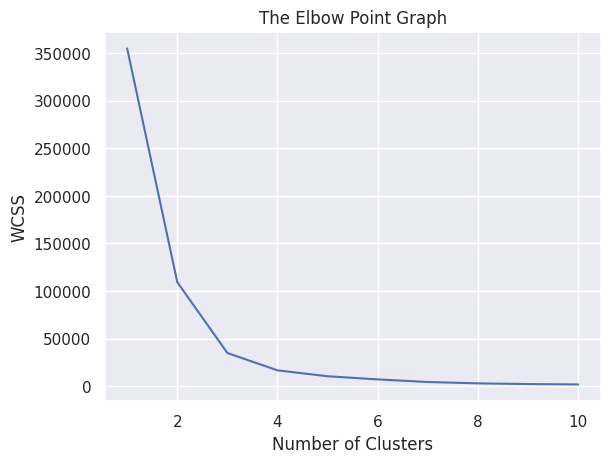

In [ ]:
# # plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

==> the number is 3

Training the k-Means Clustering Model :

In [ ]:

kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(plot)

print(y)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


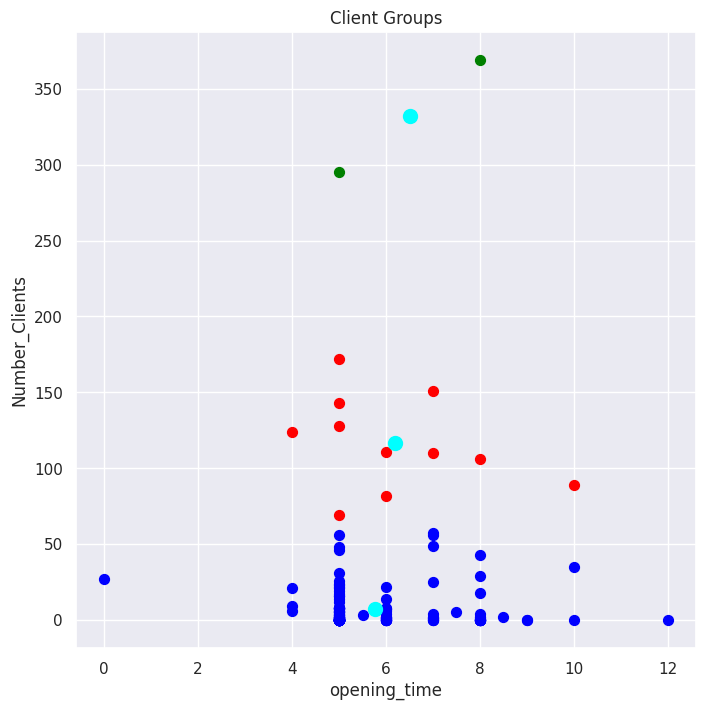

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))

plt.scatter(plot[y==0,0],plot[y==0,1], s=50, c='blue', label='cluster 1')
plt.scatter(plot[y==1,0],plot[y==1,1], s=50, c='Red', label='cluster 2')
plt.scatter(plot[y==2,0],plot[y==2,1], s=50, c='Green', label='cluster 3')

#plt.show()
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')

plt.title('Client Groups')
plt.xlabel('opening_time')
plt.ylabel('Number_Clients')
plt.show()